In [1]:
import cv2 as cv
import pickle
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import pyplot as plt
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
d = unpickle('../data/data_batch_1')

In [4]:
s_visited = [0] * 10
pic_array = []
total = 0
for index, labels in enumerate(d[b'labels']):
    if s_visited[labels] == 0:
        pic_array.append(d[b'data'][index].reshape(3, 32, 32))
        total += 1
        s_visited[labels] = 1
        if total >= 10:
            break

In [5]:
len(pic_array)

10

In [31]:
def show_pic(img, rank):

    img = img.transpose(1, 2, 0)
    
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    edge_1 = cv.Canny(gray, 50, 100)
    edge_2 = cv.Canny(gray, 100, 150)
    edge_3 = cv.Canny(gray, 150, 200)
    edge_4 = cv.Canny(gray, 200, 250)
    plt.figure()
    f, axarr = plt.subplots(1, 4, figsize=(15, 15)) 
    axarr[0].imshow(edge_1, cmap='gray', vmin=0, vmax=255)
    axarr[1].imshow(edge_2, cmap='gray', vmin=0, vmax=255)
    axarr[2].imshow(edge_3, cmap='gray', vmin=0, vmax=255)
    axarr[3].imshow(edge_4, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    grad_x = cv.Sobel(gray, -1, 1, 0)
    grad_y = cv.Sobel(gray, -1, 0, 1)
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)
    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    plt.figure()
    f, axarr = plt.subplots(1, 3, figsize=(15, 15)) 
    axarr[0].imshow(grad_x, cmap='gray', vmin=0, vmax=255)
    axarr[1].imshow(grad_y, cmap='gray', vmin=0, vmax=255)
    axarr[2].imshow(grad, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    cv.imwrite('../data/HW1/problem2_results/{}_img.jpg'.format(rank), img)
    cv.imwrite('../data/HW1/problem2_results/{}_edge_1.jpg'.format(rank), edge_1)
    cv.imwrite('../data/HW1/problem2_results/{}_edge_2.jpg'.format(rank), edge_2)
    cv.imwrite('../data/HW1/problem2_results/{}_edge_3.jpg'.format(rank), edge_3)
    cv.imwrite('../data/HW1/problem2_results/{}_edge_4.jpg'.format(rank), edge_4)
    cv.imwrite('../data/HW1/problem2_results/{}_grad_x.jpg'.format(rank), grad_x)
    cv.imwrite('../data/HW1/problem2_results/{}_grad_y.jpg'.format(rank), grad_y)
    cv.imwrite('../data/HW1/problem2_results/{}_grad.jpg'.format(rank), grad)

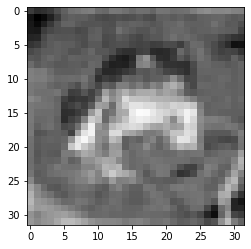

<Figure size 432x288 with 0 Axes>

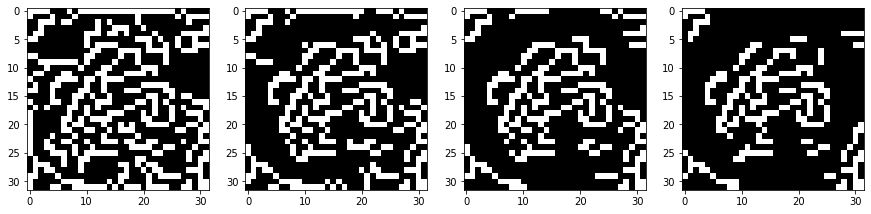

<Figure size 432x288 with 0 Axes>

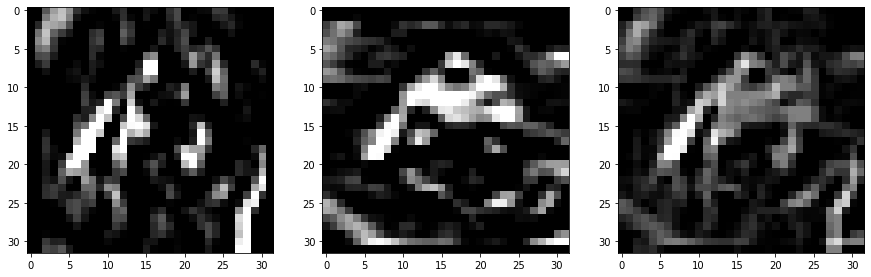

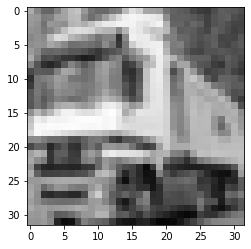

<Figure size 432x288 with 0 Axes>

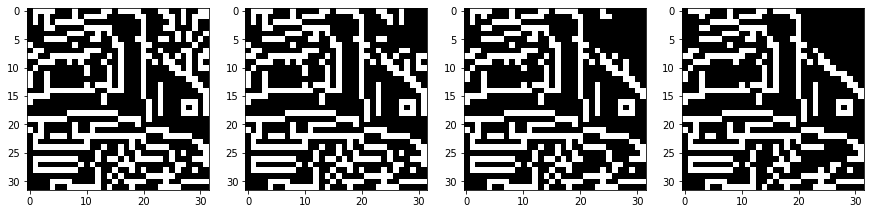

<Figure size 432x288 with 0 Axes>

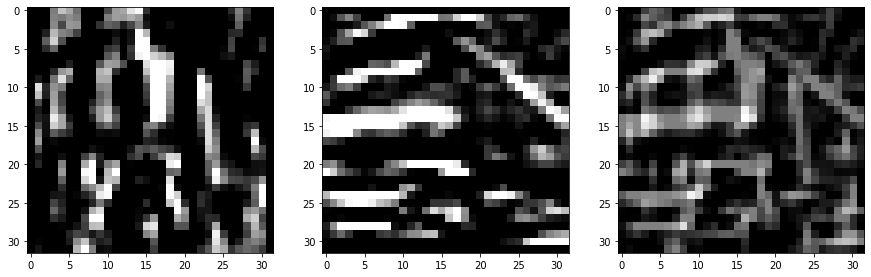

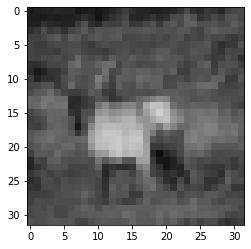

<Figure size 432x288 with 0 Axes>

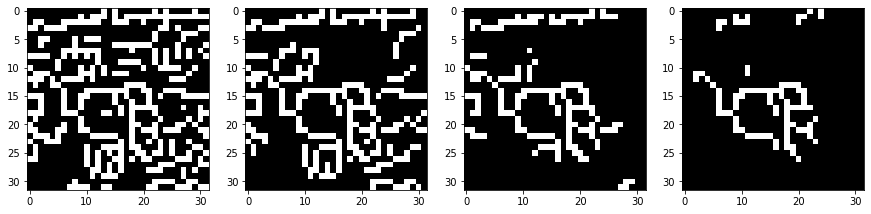

<Figure size 432x288 with 0 Axes>

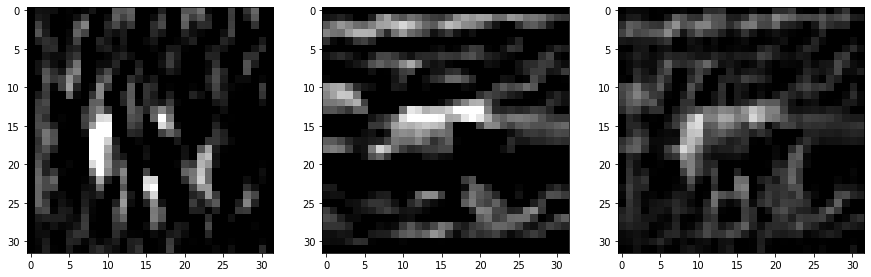

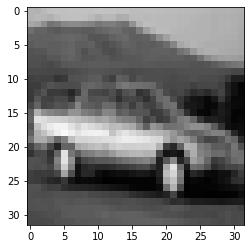

<Figure size 432x288 with 0 Axes>

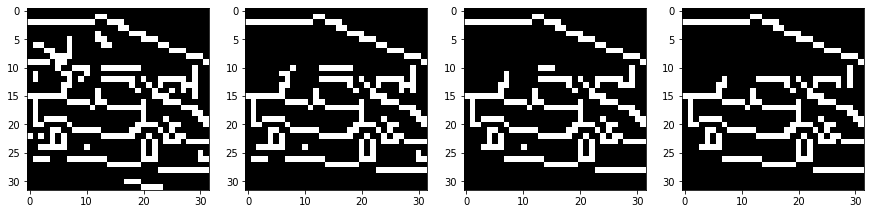

<Figure size 432x288 with 0 Axes>

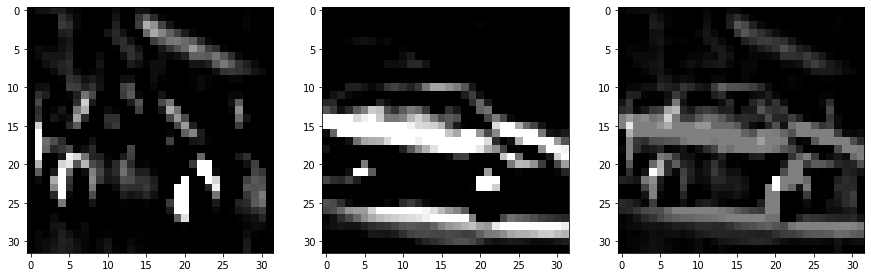

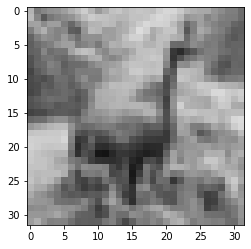

<Figure size 432x288 with 0 Axes>

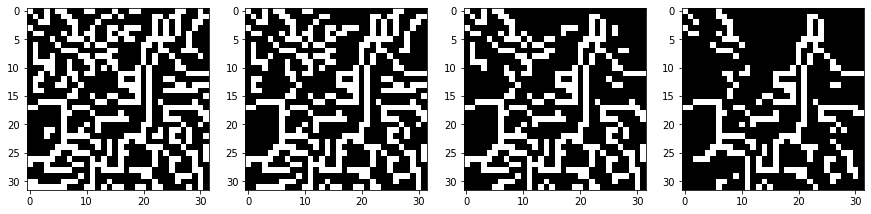

<Figure size 432x288 with 0 Axes>

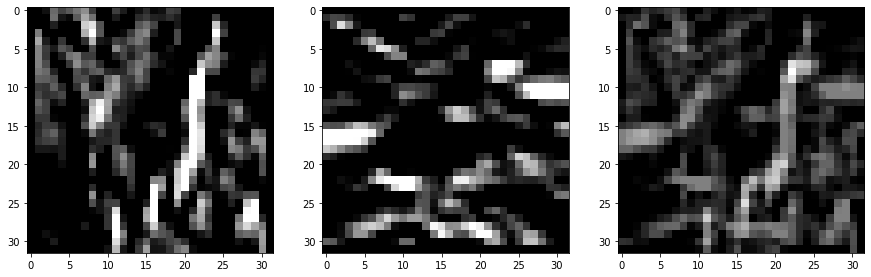

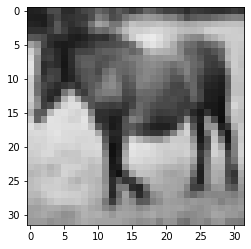

<Figure size 432x288 with 0 Axes>

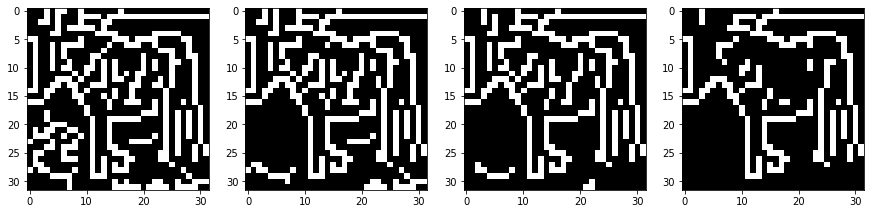

<Figure size 432x288 with 0 Axes>

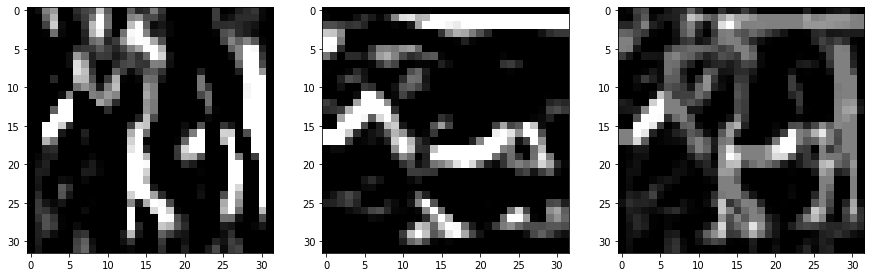

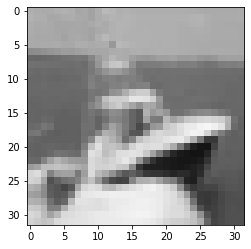

<Figure size 432x288 with 0 Axes>

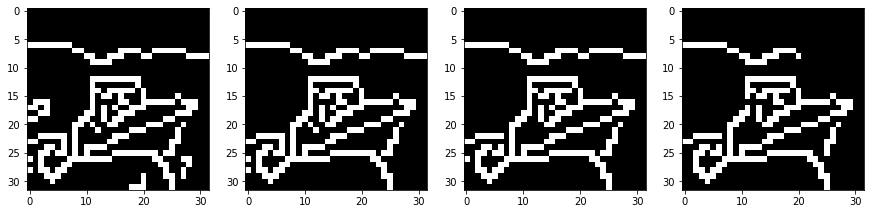

<Figure size 432x288 with 0 Axes>

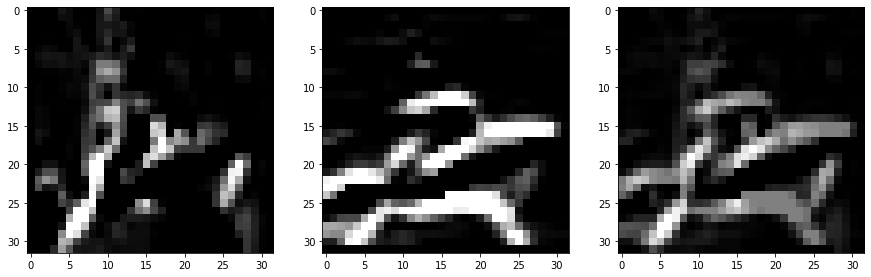

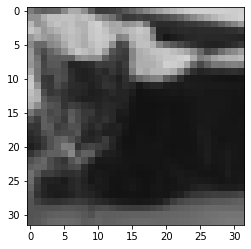

<Figure size 432x288 with 0 Axes>

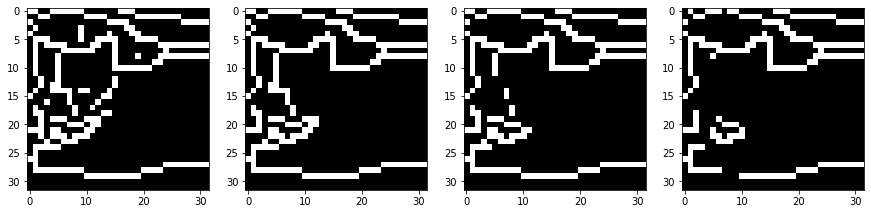

<Figure size 432x288 with 0 Axes>

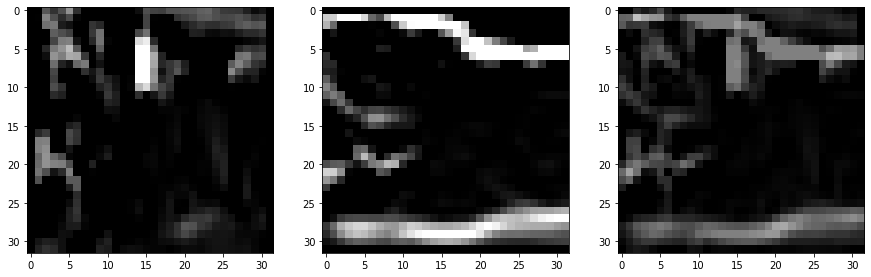

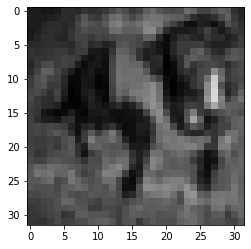

<Figure size 432x288 with 0 Axes>

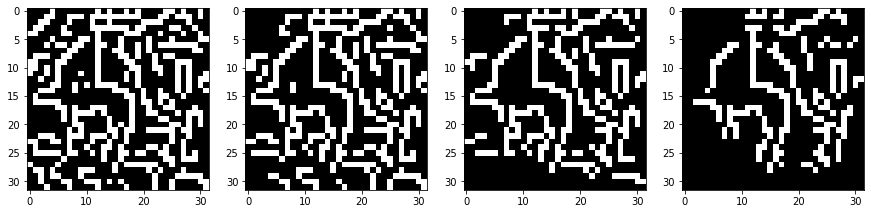

<Figure size 432x288 with 0 Axes>

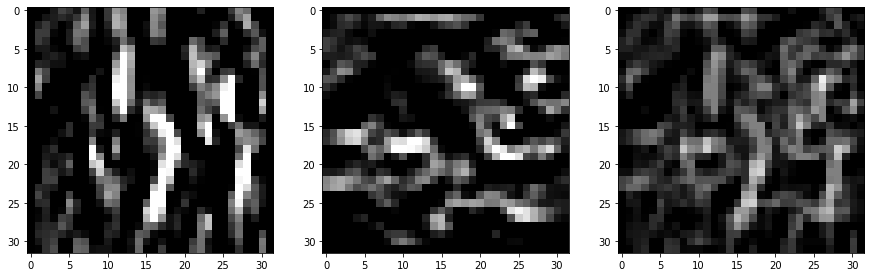

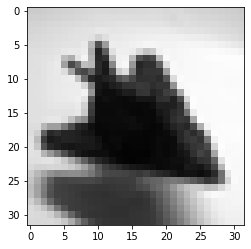

<Figure size 432x288 with 0 Axes>

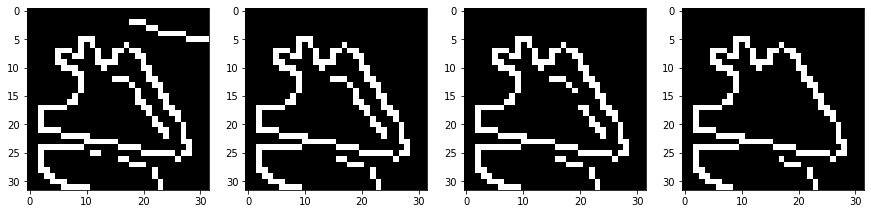

<Figure size 432x288 with 0 Axes>

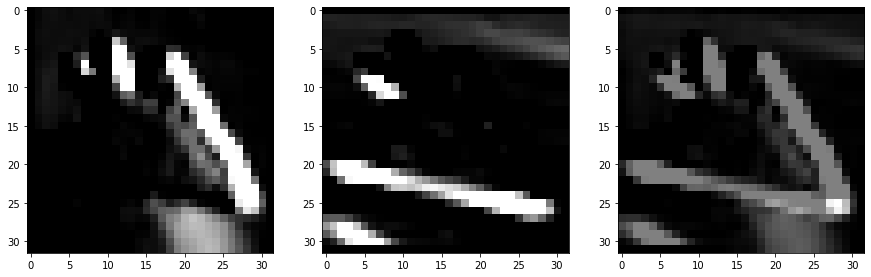

In [32]:
for index, img in enumerate(pic_array):
    show_pic(img, index)